
D. Color Image Processing
1. Implement color space conversions between RGB, HSI, and YCbCr color models.
2. Perform color histogram equalization on a color image and analyze the results.
3. Implement color edge detection using Sobel or Canny operators.


Enter the path of the image for color space conversions: /content/lena.jpeg


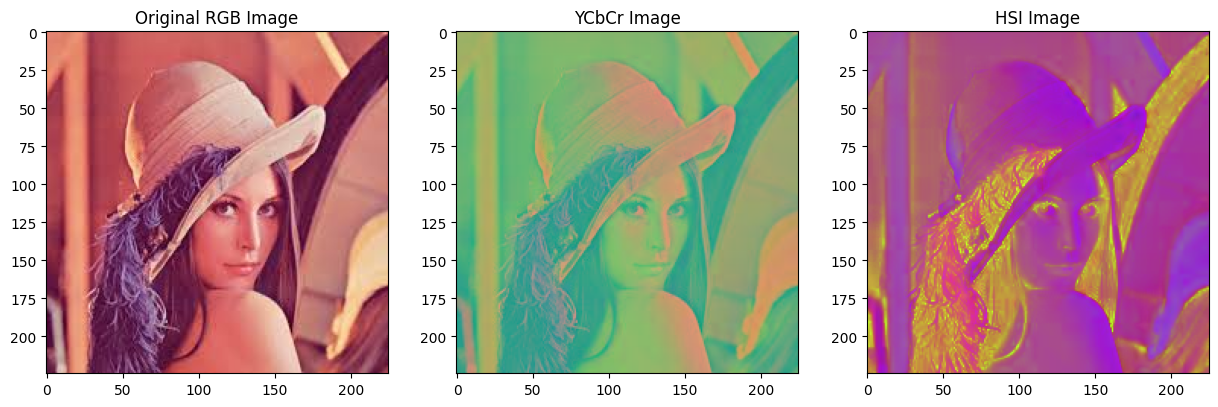

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to convert RGB to HSI
def rgb_to_hsi(image):
    # Normalize the RGB values to [0, 1]
    image = image / 255.0
    R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
    H, S, I = np.zeros_like(R), np.zeros_like(G), np.zeros_like(B)

    # Calculate Intensity
    I = (R + G + B) / 3.0

    # Calculate Saturation
    min_rgb = np.minimum(np.minimum(R, G), B)
    S = 1 - (min_rgb / (I + 1e-6))  # Adding a small epsilon to avoid division by zero

    # Calculate Hue
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G)**2 + (R - B) * (G - B))
    theta = np.arccos(numerator / (denominator + 1e-6))

    H[B > G] = 2 * np.pi - theta[B > G]
    H[B <= G] = theta[B <= G]
    H = H / (2 * np.pi)  # Normalize to [0, 1]

    hsi_image = np.dstack((H, S, I))
    return hsi_image

# Main function for color space conversions
def color_space_conversions(image_path):
    # Load an RGB image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not open the image.")
        return

    # Convert RGB to YCbCr
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Convert RGB to HSI
    hsi_image = rgb_to_hsi(image)

    # Display the images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original RGB Image")
    plt.subplot(1, 3, 2), plt.imshow(ycbcr_image), plt.title("YCbCr Image")
    plt.subplot(1, 3, 3), plt.imshow(hsi_image), plt.title("HSI Image")
    plt.show()

# Run color space conversion
image_path = input("Enter the path of the image for color space conversions: ")
color_space_conversions(image_path)


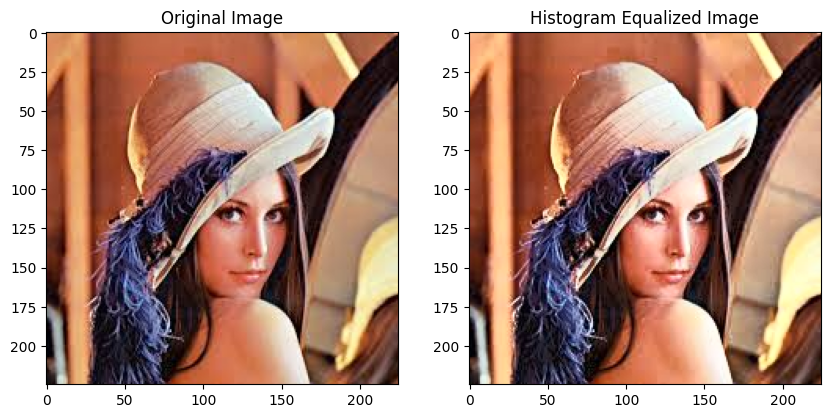

In [ ]:
def color_histogram_equalization(image_path):
    # Load an RGB image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not open the image.")
        return

    # Convert the image to YCbCr color space
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Apply histogram equalization only to the Y channel
    ycbcr_image[:,:,0] = cv2.equalizeHist(ycbcr_image[:,:,0])

    # Convert back to RGB color space
    equalized_image = cv2.cvtColor(ycbcr_image, cv2.COLOR_YCrCb2BGR)

    # Display the original and equalized images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB)), plt.title("Histogram Equalized Image")
    plt.show()

# Run color histogram equalization
color_histogram_equalization(image_path)


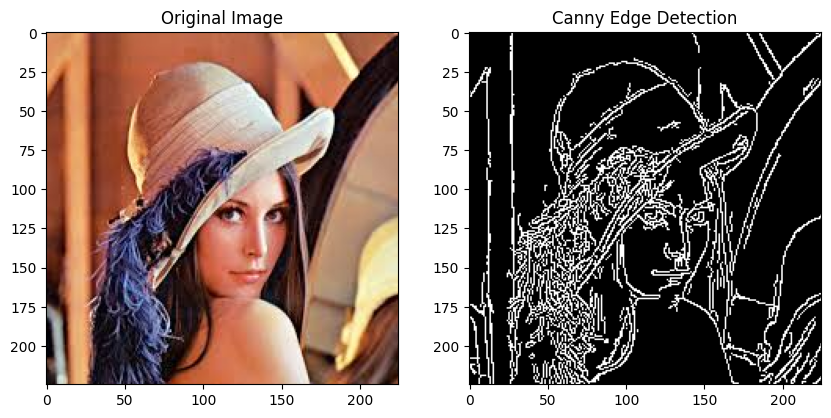

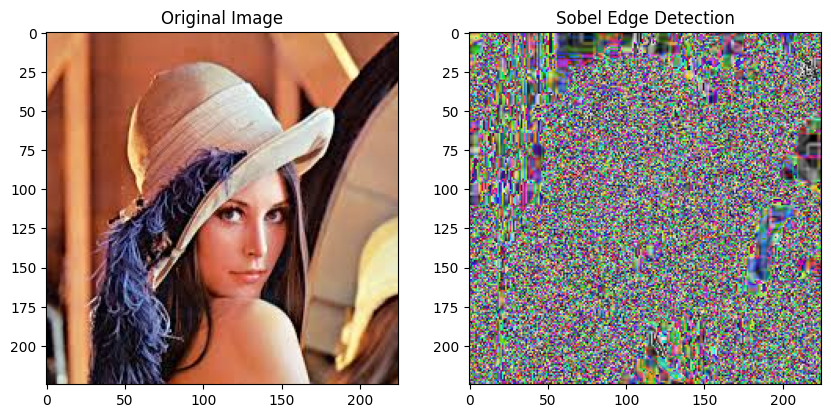

In [ ]:
def color_edge_detection(image_path, method="canny"):
    # Load an RGB image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not open the image.")
        return

    # Convert to grayscale if necessary
    if method == "canny":
        # Apply Canny edge detection on each color channel
        edges_b = cv2.Canny(image[:,:,0], 100, 200)
        edges_g = cv2.Canny(image[:,:,1], 100, 200)
        edges_r = cv2.Canny(image[:,:,2], 100, 200)

        # Combine edges
        edges = cv2.bitwise_or(edges_b, edges_g)
        edges = cv2.bitwise_or(edges, edges_r)
    elif method == "sobel":
        # Apply Sobel edge detection on each color channel
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

        # Combine edges
        edges = cv2.magnitude(sobel_x, sobel_y).astype(np.uint8)
    else:
        print("Invalid method. Choose 'canny' or 'sobel'.")
        return

    # Display the result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
    plt.subplot(1, 2, 2), plt.imshow(edges, cmap='gray'), plt.title(f"{method.capitalize()} Edge Detection")
    plt.show()

# Run color edge detection
color_edge_detection(image_path, method="canny")
color_edge_detection(image_path, method="sobel") # or method="sobel"

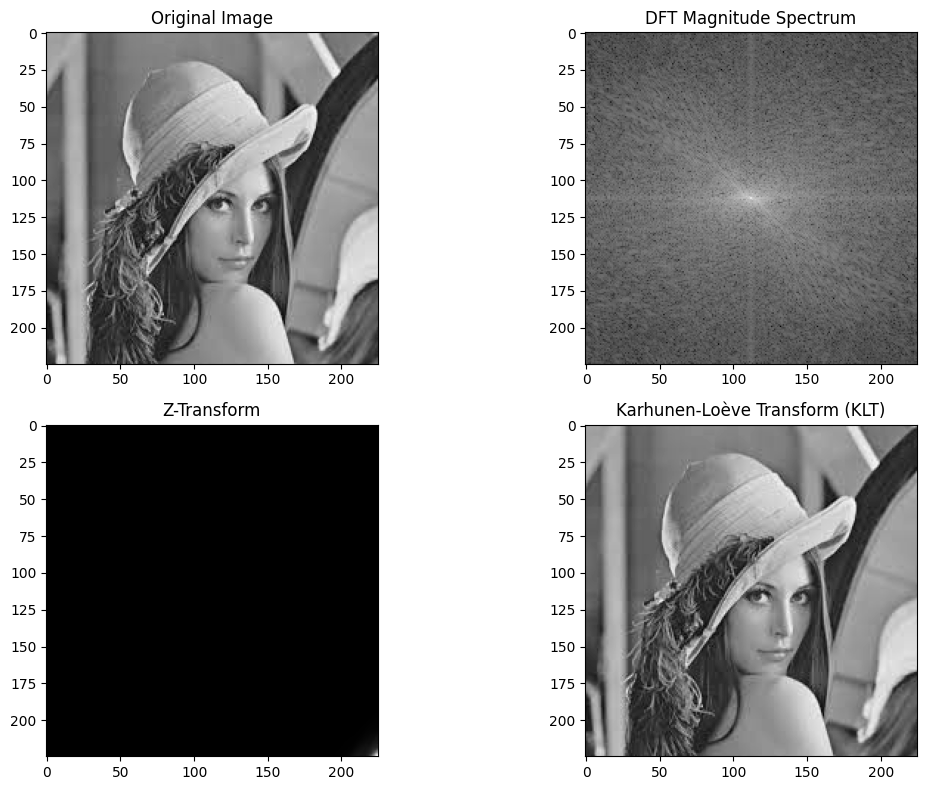

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
image = cv2.imread('/content/lena.jpeg', cv2.IMREAD_GRAYSCALE)

# 1. Discrete Fourier Transform (DFT)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift the zero frequency component to the center
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# 2. Z-Transform (2D version for visualization)
def z_transform(image, z_val=1):
    rows, cols = image.shape
    z_transform_image = np.zeros_like(image, dtype=np.complex128)
    for u in range(rows):
        for v in range(cols):
            z_transform_image[u, v] = image[u, v] * (z_val ** (u + v))
    return np.abs(z_transform_image)

z_val = 1.2  # Change this value for different transformations
z_transformed = z_transform(image, z_val=z_val)

# 3. Karhunen-Loève Transform (KLT using PCA)
mean, eigenvectors = cv2.PCACompute(image.reshape(-1, 1), mean=None)
projected = cv2.PCAProject(image.reshape(-1, 1), mean, eigenvectors)
klt_image = projected.reshape(image.shape)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("DFT Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')

plt.subplot(2, 2, 3)
plt.title("Z-Transform")
plt.imshow(z_transformed, cmap='gray')

plt.subplot(2, 2, 4)
plt.title("Karhunen-Loève Transform (KLT)")
plt.imshow(klt_image, cmap='gray')

plt.tight_layout()
plt.show()


TypeError: unhashable type: 'numpy.ndarray'

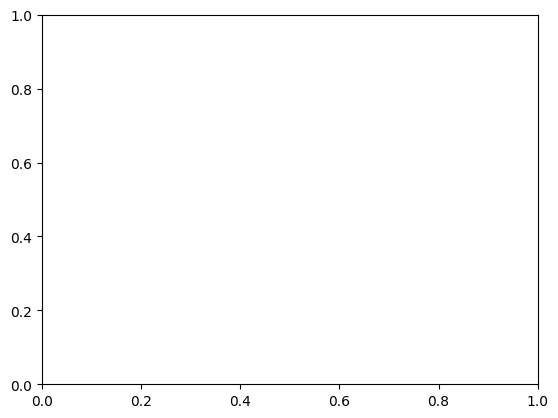

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# now we will be loading the image and converting it to grayscale
image = cv2.imread(r"/content/lena.jpeg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Display the magnitude of the Fourier Transform
plt.show('Fourier Transform', magnitude)
cv2.waitKey(0)
cv2.destroyAllWindows()

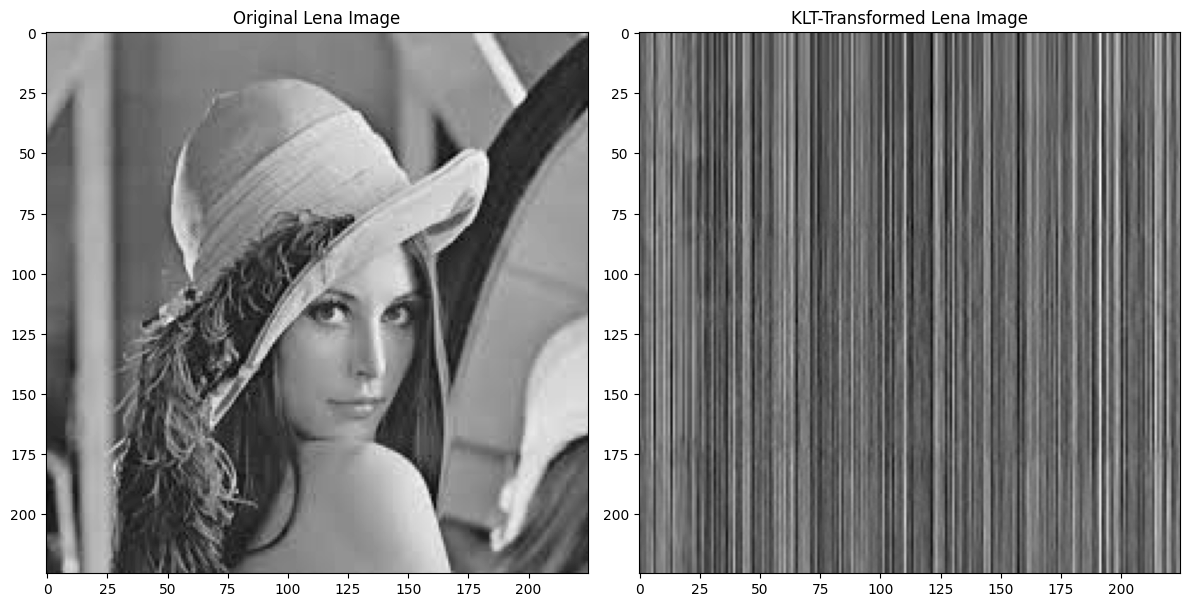

Eigenvalues of the Covariance Matrix:
[9.95192554e+04 6.35388289e+04 3.84756318e+04 3.03498135e+04
 2.67802422e+04 1.81018375e+04 1.65736988e+04 9.99202817e+03
 9.07637322e+03 6.54022278e+03 5.66798460e+03 5.00814708e+03
 4.89865233e+03 4.61007656e+03 3.95392956e+03 3.78812670e+03
 3.12591698e+03 2.85039439e+03 2.55505154e+03 2.40062682e+03
 2.23763074e+03 1.82273842e+03 1.74325618e+03 1.52237726e+03
 1.49843114e+03 1.41941849e+03 1.30116696e+03 1.13306941e+03
 1.11280757e+03 1.05003081e+03 1.01527347e+03 9.69062735e+02
 9.05080406e+02 9.23722996e+02 8.57169392e+02 7.84971173e+02
 7.80014375e+02 7.21516379e+02 7.10234589e+02 6.61719055e+02
 6.36535208e+02 5.94834771e+02 5.70522558e+02 5.42511347e+02
 5.23930946e+02 4.92071020e+02 4.71432744e+02 4.68436776e+02
 4.38093599e+02 4.19382422e+02 3.88937452e+02 3.66466632e+02
 3.61565841e+02 3.42025418e+02 3.36460407e+02 3.27505728e+02
 3.11322145e+02 3.01153442e+02 2.93343188e+02 2.74059035e+02
 2.68781078e+02 2.49389916e+02 2.46207745e+02 2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def KLT(a):
    """
    Returns Karhunen Loeve Transform of the input, the transformation matrix, and eigenvalues.
    """
    # Compute eigenvalues and eigenvectors of the covariance matrix
    val, vec = np.linalg.eig(np.cov(a))
    # Compute the KLT
    klt = np.dot(vec, a)
    return klt, vec, val

# Load Lena image in grayscale
image = cv2.imread('lena.jpeg', cv2.IMREAD_GRAYSCALE)

# Reshape the image into a 2D matrix
# Each row is a feature, and each column is a sample
reshaped_image = image.T  # Transpose to match expected input format for KLT

# Apply the KLT
klt_result, eigenvectors, eigenvalues = KLT(reshaped_image)

# Visualize the results
# KLT-transformed image needs to be reshaped back for visualization
transformed_image = klt_result.T

plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Lena Image")
plt.imshow(image, cmap='gray')

# KLT-Transformed Image
plt.subplot(1, 2, 2)
plt.title("KLT-Transformed Lena Image")
plt.imshow(transformed_image, cmap='gray')

plt.tight_layout()
plt.show()

# Print the eigenvalues
print("Eigenvalues of the Covariance Matrix:")
print(eigenvalues)


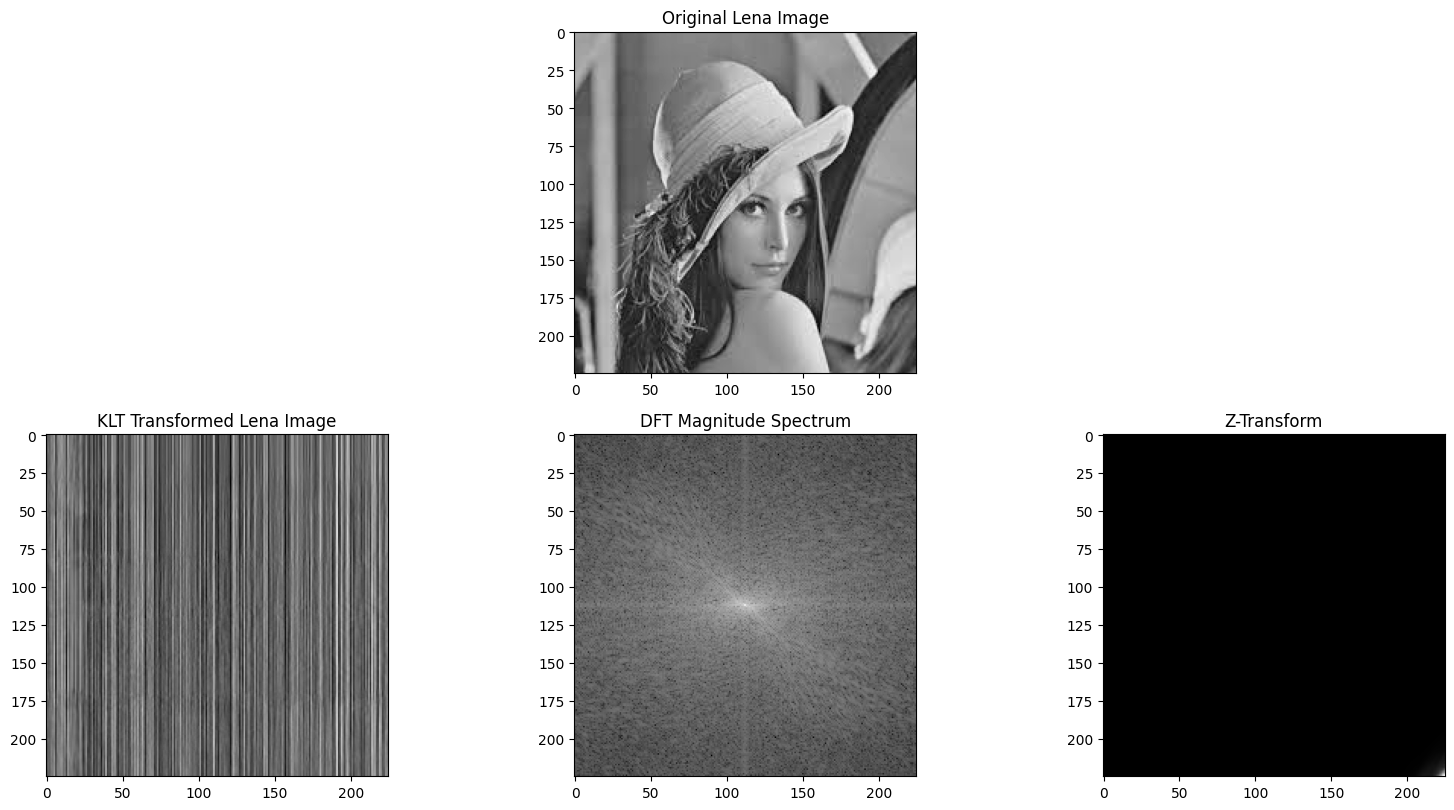

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def KLT(a):
    """
    Computes the Karhunen-Loève Transform (KLT) of the input array.
    Returns:
    - KLT result
    - Transformation matrix (eigenvectors)
    - Eigenvalues of the covariance matrix
    """
    # Compute eigenvalues and eigenvectors of the covariance matrix
    val, vec = np.linalg.eig(np.cov(a))
    # Compute the KLT
    klt = np.dot(vec, a)
    return klt, vec, val

# Load Lena image in grayscale
lena_path = '/content/lena.jpeg'
image_lena = cv2.imread(lena_path, cv2.IMREAD_GRAYSCALE)

if image_lena is None:
    raise FileNotFoundError(f"Lena image not found at path: {lena_path}")

# Reshape the Lena image into a 2D matrix for KLT
reshaped_image_lena = image_lena.T  # Transpose to match expected input format for KLT

# Apply the KLT on Lena image
klt_result_lena, eigenvectors_lena, eigenvalues_lena = KLT(reshaped_image_lena)

# KLT-transformed Lena image reshaped back for visualization
transformed_image_lena = klt_result_lena.T

# Load another grayscale image for DFT and Z-transform
image_path = '/content/lena.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert the image to float for processing
image_float = np.float32(image)

# 1. Discrete Fourier Transform (DFT)
dft = cv2.dft(image_float, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift the zero-frequency component to the center
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# 2. Z-Transform (2D version for visualization)
def z_transform(image, z_val=1):
    """
    Computes a 2D Z-Transform for visualization.
    Args:
    - image: Input grayscale image
    - z_val: Z-transform parameter
    Returns:
    - Z-transformed image (absolute values)
    """
    rows, cols = image.shape
    z_transform_image = np.zeros_like(image, dtype=np.complex128)
    for u in range(rows):
        for v in range(cols):
            z_transform_image[u, v] = image[u, v] * (z_val ** (u + v))
    return np.abs(z_transform_image)

z_val = 1.2  # Change this value for different transformations
z_transformed = z_transform(image, z_val=z_val)

# 3. Karhunen-Loève Transform (KLT using PCA for the second image)
mean, eigenvectors_image = cv2.PCACompute(image.reshape(-1, 1), mean=None)
projected = cv2.PCAProject(image.reshape(-1, 1), mean, eigenvectors_image)
klt_image = projected.reshape(image.shape)

# Plot the results
plt.figure(figsize=(16, 12))

# Lena image results
plt.subplot(3, 3, 2)
plt.title("Original Lena Image")
plt.imshow(image_lena, cmap='gray')

plt.subplot(3, 3, 4)
plt.title("KLT Transformed Lena Image")
plt.imshow(transformed_image_lena, cmap='gray')

plt.subplot(3, 3, 5)
plt.title("DFT Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')

plt.subplot(3, 3, 6)
plt.title("Z-Transform")
plt.imshow(z_transformed, cmap='gray')


plt.tight_layout()
plt.show()



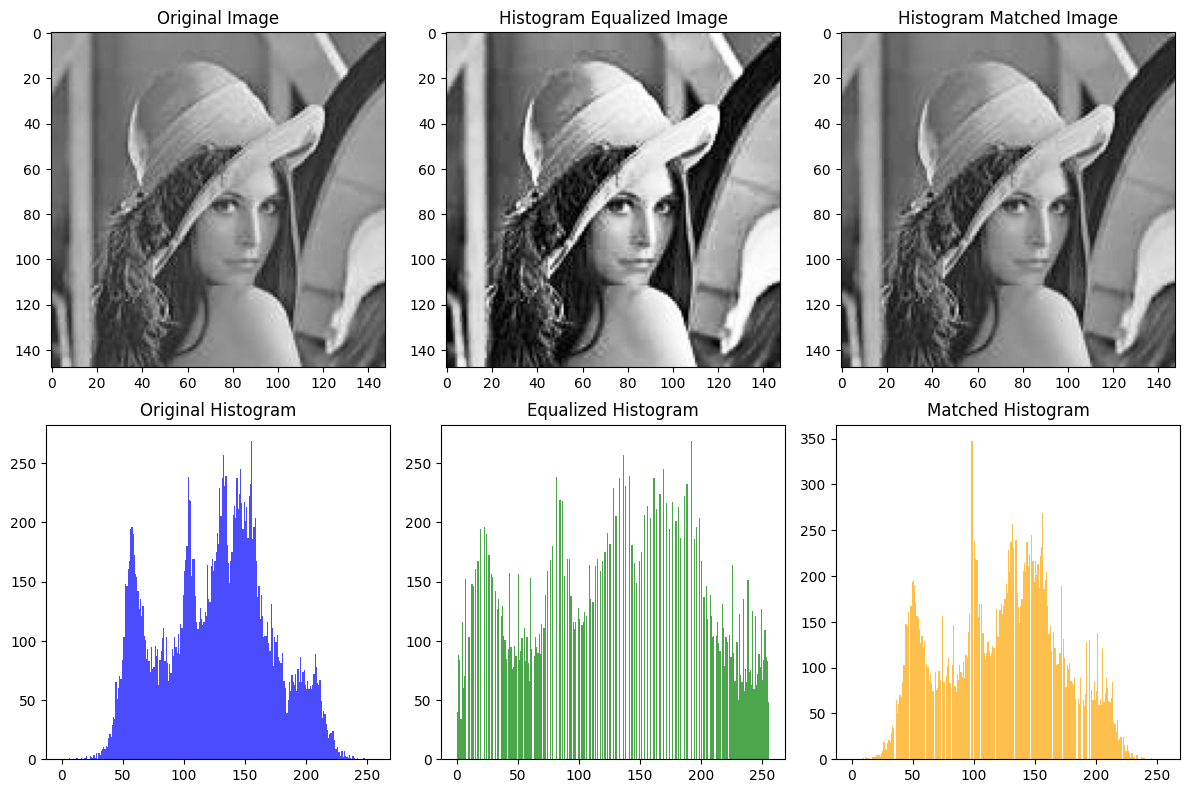

Entropy (Original Image): 7.385341374425472
Entropy (Equalized Image): 7.245806808602913
Entropy (Matched Image): 7.385341374425472


In [ ]:
import cv2
import numpy as np
from skimage.exposure import match_histograms
from skimage.measure import shannon_entropy
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread('/content/color_lena.jpeg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError("Image not found. Please check the file path.")

# 1. Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# 2. Histogram Matching
# Use another image as reference
reference_image = cv2.imread('/content/lena.jpeg', cv2.IMREAD_GRAYSCALE)
if reference_image is None:
    raise FileNotFoundError("Reference image not found. Please check the file path.")

# Perform histogram matching
matched_image = match_histograms(image, reference_image, channel_axis=None)

# 3. Quantitative Comparison - Compute Entropy
original_entropy = shannon_entropy(image)
equalized_entropy = shannon_entropy(equalized_image)
matched_entropy = shannon_entropy(matched_image)

# Display results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title("Histogram Equalized Image")
plt.imshow(equalized_image, cmap='gray')

plt.subplot(2, 3, 3)
plt.title("Histogram Matched Image")
plt.imshow(matched_image, cmap='gray')

# Display histograms
plt.subplot(2, 3, 4)
plt.title("Original Histogram")
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)

plt.subplot(2, 3, 5)
plt.title("Equalized Histogram")
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)

plt.subplot(2, 3, 6)
plt.title("Matched Histogram")
plt.hist(matched_image.ravel(), bins=256, range=(0, 256), color='orange', alpha=0.7)

plt.tight_layout()
plt.show()

# Print Entropy Metrics
print("Entropy (Original Image):", original_entropy)
print("Entropy (Equalized Image):", equalized_entropy)
print("Entropy (Matched Image):", matched_entropy)


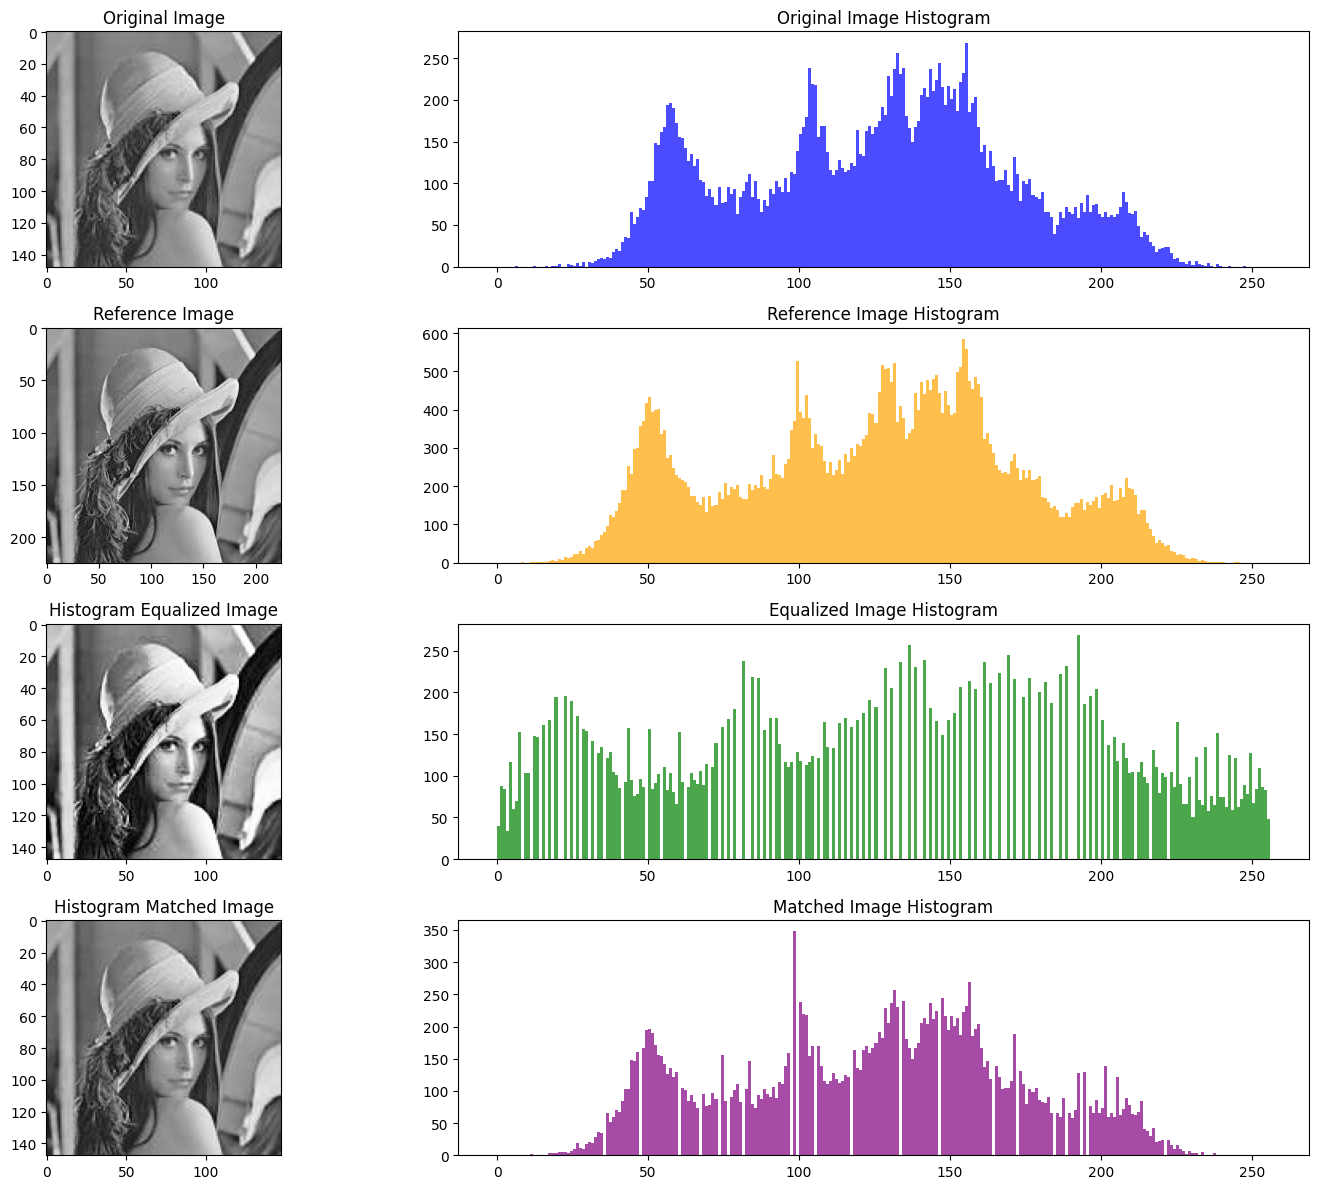

Entropy (Original Image): 7.385341374425472
Entropy (Reference Image): 7.4694457155071
Entropy (Equalized Image): 7.245806808602913
Entropy (Matched Image): 7.385341374425472


In [ ]:
import cv2
import numpy as np
from skimage.exposure import match_histograms
from skimage.measure import shannon_entropy
import matplotlib.pyplot as plt

# Load the original grayscale image
image = cv2.imread('/content/color_lena.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Original image not found. Please check the file path.")

# Load the reference grayscale image
reference_image = cv2.imread('/content/lena.jpeg', cv2.IMREAD_GRAYSCALE)
if reference_image is None:
    raise FileNotFoundError("Reference image not found. Please check the file path.")

# 1. Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# 2. Histogram Matching
matched_image = match_histograms(image, reference_image, channel_axis=None)

# 3. Quantitative Comparison - Compute Entropy
original_entropy = shannon_entropy(image)
reference_entropy = shannon_entropy(reference_image)
equalized_entropy = shannon_entropy(equalized_image)
matched_entropy = shannon_entropy(matched_image)

# Display results
plt.figure(figsize=(16, 12))

# Original Image
plt.subplot(4, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

# Original Image Histogram
plt.subplot(4, 2, 2)
plt.title("Original Image Histogram")
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)

# Reference Image
plt.subplot(4, 2, 3)
plt.title("Reference Image")
plt.imshow(reference_image, cmap='gray')

# Reference Image Histogram
plt.subplot(4, 2, 4)
plt.title("Reference Image Histogram")
plt.hist(reference_image.ravel(), bins=256, range=(0, 256), color='orange', alpha=0.7)

# Equalized Image
plt.subplot(4, 2, 5)
plt.title("Histogram Equalized Image")
plt.imshow(equalized_image, cmap='gray')

# Equalized Image Histogram
plt.subplot(4, 2, 6)
plt.title("Equalized Image Histogram")
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)

# Matched Image
plt.subplot(4, 2, 7)
plt.title("Histogram Matched Image")
plt.imshow(matched_image, cmap='gray')

# Matched Image Histogram
plt.subplot(4, 2, 8)
plt.title("Matched Image Histogram")
plt.hist(matched_image.ravel(), bins=256, range=(0, 256), color='purple', alpha=0.7)

plt.tight_layout()
plt.show()

# Print Entropy Metrics
print("Entropy (Original Image):", original_entropy)
print("Entropy (Reference Image):", reference_entropy)
print("Entropy (Equalized Image):", equalized_entropy)
print("Entropy (Matched Image):", matched_entropy)


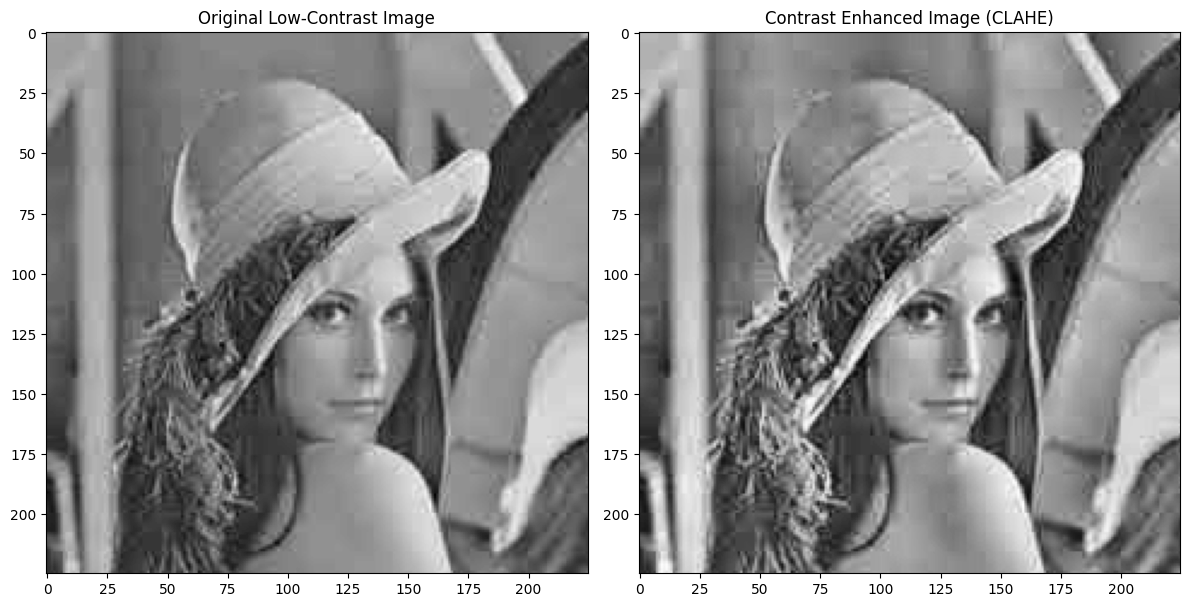

Entropy (Original Low-Contrast Image): 6.4290533346816705
Entropy (Enhanced Image): 7.2332059936319055


In [ ]:
def contrast_enhancement(image):
    """
    Enhance the contrast of a low-contrast image using CLAHE.
    """
    # Create CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    return enhanced_image

# Load a low-contrast image
low_contrast_image = cv2.imread('low_contrast.jpg', cv2.IMREAD_GRAYSCALE)

if low_contrast_image is None:
    raise FileNotFoundError("Low-contrast image not found. Please check the file path.")

# Apply contrast enhancement
enhanced_image = contrast_enhancement(low_contrast_image)

# Quantitative Evaluation - Entropy
original_entropy = shannon_entropy(low_contrast_image)
enhanced_entropy = shannon_entropy(enhanced_image)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Low-Contrast Image")
plt.imshow(low_contrast_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Contrast Enhanced Image (CLAHE)")
plt.imshow(enhanced_image, cmap='gray')

plt.tight_layout()
plt.show()

# Print Entropy Metrics
print("Entropy (Original Low-Contrast Image):", original_entropy)
print("Entropy (Enhanced Image):", enhanced_entropy)


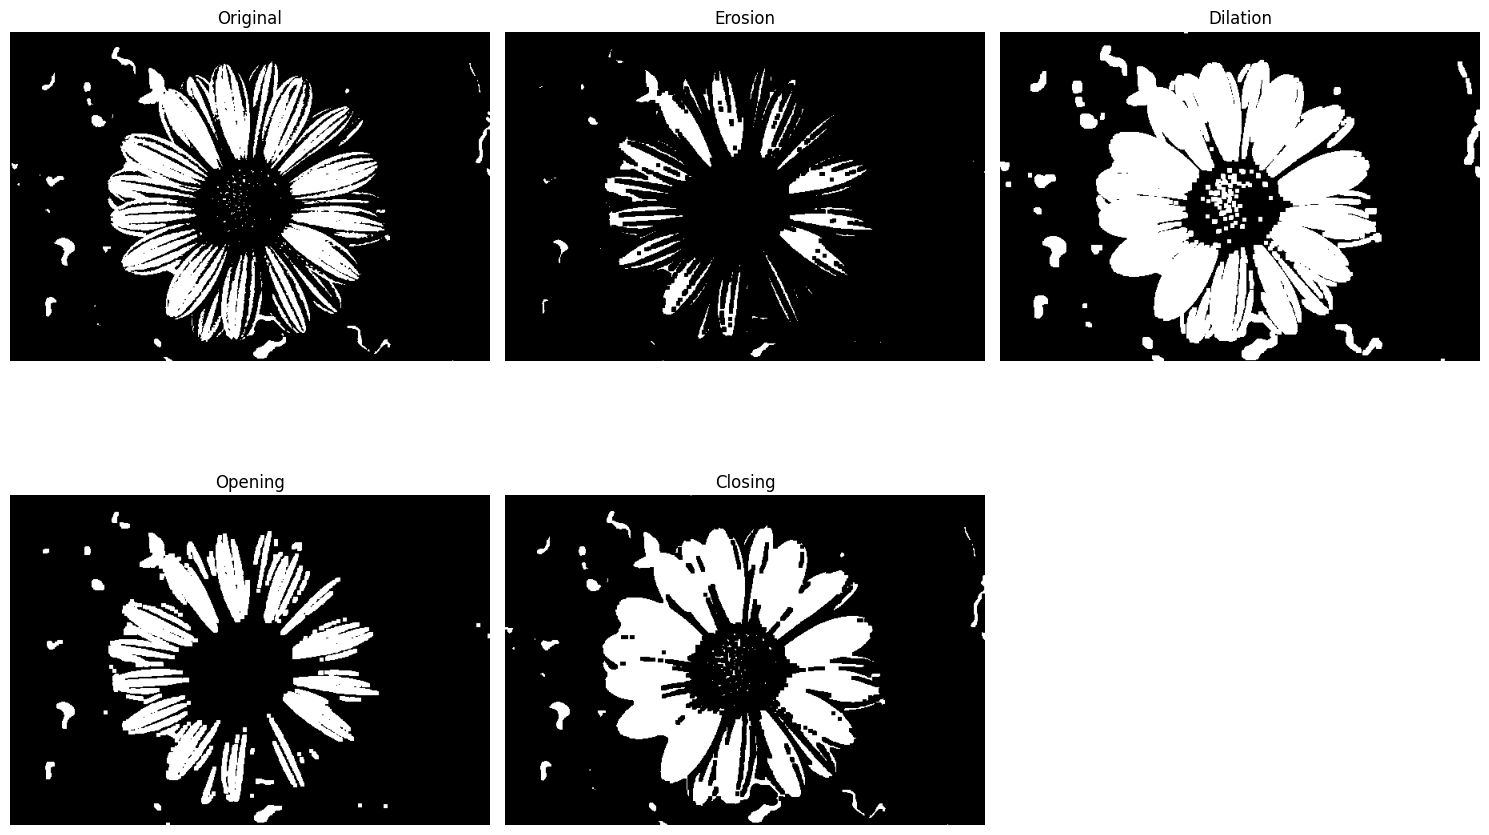

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a binary image
# Replace 'binary_image.png' with your binary image file
image = cv2.imread('/content/flower.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold the image to ensure it's binary
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Create a kernel
kernel = np.ones((5, 5), np.uint8)

# Apply morphological operations
erosion = cv2.erode(binary, kernel, iterations=1)
dilation = cv2.dilate(binary, kernel, iterations=1)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Plot the results
titles = ['Original', 'Erosion', 'Dilation', 'Opening', 'Closing']
images = [binary, erosion, dilation, opening, closing]

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


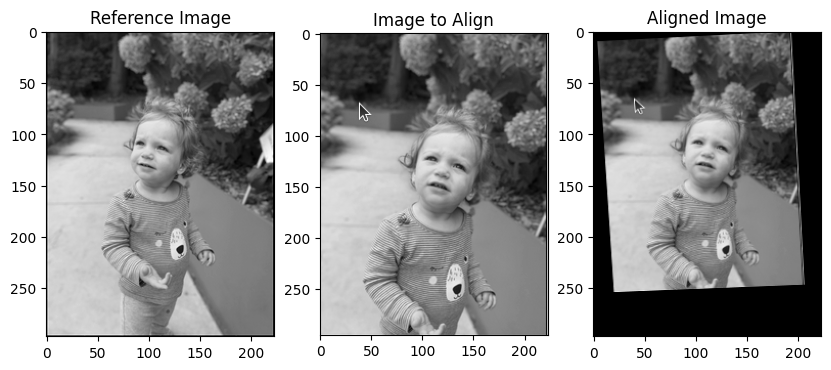

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images to be aligned
img1 = cv2.imread("image1.png", cv2.IMREAD_GRAYSCALE)  # Reference image
img2 = cv2.imread("image2.png", cv2.IMREAD_GRAYSCALE)  # Image to align

# Step 1: Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Step 2: Match features using FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Step 3: Extract location of good matches
points1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Step 4: Compute homography matrix using RANSAC
H, mask = cv2.findHomography(points2, points1, cv2.RANSAC, 5.0)

# Step 5: Warp the second image to align with the first
height, width = img1.shape
aligned_img = cv2.warpPerspective(img2, H, (width, height))

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Reference Image")
plt.imshow(img1, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Image to Align")
plt.imshow(img2, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Aligned Image")
plt.imshow(aligned_img, cmap='gray')
plt.show()

# Save the aligned image
cv2.imwrite("aligned_image.jpg", aligned_img)


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('image1.png', cv.IMREAD_GRAYSCALE)  # referenceImage
img2 = cv.imread('image2.png', cv.IMREAD_GRAYSCALE)  # sensedImage

#  Resize the image by a factor of 8 on each side. If your images are
# very high-resolution, you can try to resize even more, but if they are
# already small you should set this to something less agressive.
resize_factor = 1.0/8.0

img1_rs = cv.resize(img1, (0,0), fx=resize_factor, fy=resize_factor)
img2_rs = cv.resize(img2, (0,0), fx=resize_factor, fy=resize_factor)

# Initiate SIFT detector
sift_detector = cv.SIFT_create()

# Find the keypoints and descriptors with SIFT on the lower resolution images
kp1, des1 = sift_detector.detectAndCompute(img1_rs, None)
kp2, des2 = sift_detector.detectAndCompute(img2_rs, None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Filter out poor matches
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append(m)

matches = good_matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Find homography
H, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Get low-res and high-res sizes
low_height, low_width = img1_rs.shape
height, width = img1.shape
low_size = np.float32([[0, 0], [0, low_height], [low_width, low_height], [low_width, 0]])
high_size = np.float32([[0, 0], [0, height], [width, height], [width, 0]])

# Compute scaling transformations
scale_up = cv.getPerspectiveTransform(low_size, high_size)
scale_down = cv.getPerspectiveTransform(high_size, low_size)

#  Combine the transformations. Remember that the order of the transformation
# is reversed when doing matrix multiplication
# so this is actualy scale_down -> H -> scale_up
h_and_scale_up = np.matmul(scale_up, H)
scale_down_h_scale_up = np.matmul(h_and_scale_up, scale_down)

# Warp image 1 to align with image 2
img1Reg = cv2.warpPerspective(
            img1,
            scale_down_h_scale_up,
            (img2.shape[1], img2.shape[0])
          )

cv.imwrite('aligned_img1.jpg', img1Reg)

True

<ipython-input-1-04b39fe25252>:10: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(image + 1))
<ipython-input-1-04b39fe25252>:14: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype = np.uint8)


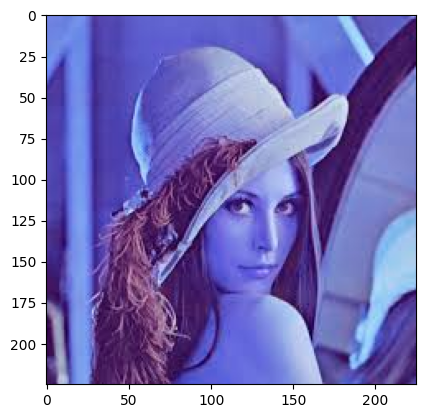

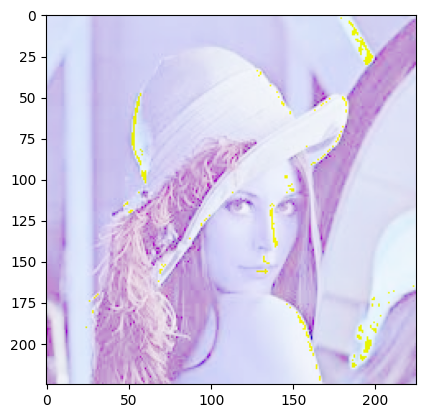

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an image
image = cv2.imread('/content/lena.jpeg')

# Apply log transformation method
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))

# Specify the data type so that
# float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)

# Display both images
plt.imshow(image)

plt.show()
plt.imshow(log_image)
plt.show()


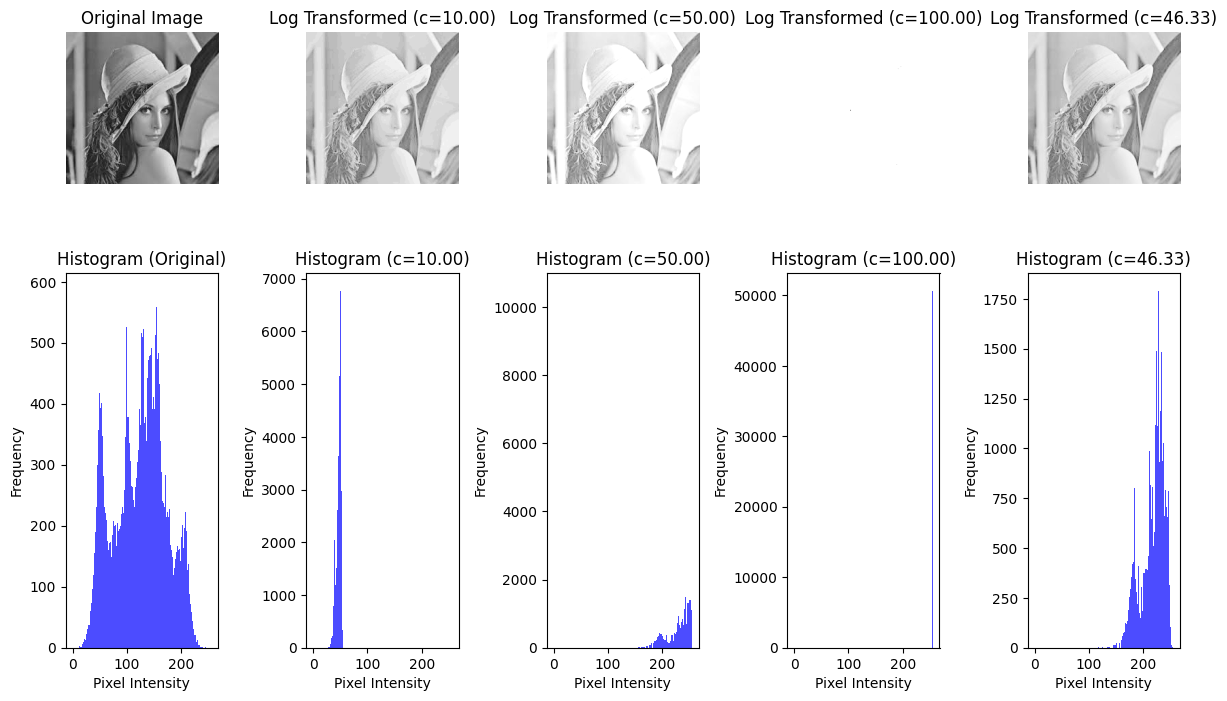

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply log transformation
def apply_log_transformation(image, c):
    # Apply log transformation
    log_image = c * (np.log1p(image))  # Using log1p for numerical stability
    # Normalize to the 8-bit range
    log_image = np.clip(log_image, 0, 255)
    return np.array(log_image, dtype=np.uint8)

# Read an image
image = cv2.imread('/content/lena.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if the image has a narrow range of low gray-level values
if np.max(image) < 100:
    print("The image has a narrow range of low gray-level values.")

# Experiment with different values of c
c_values = [10, 50, 100, 255 / np.log1p(np.max(image))]

# Apply log transformation for different c values
transformed_images = []
for c in c_values:
    log_image = apply_log_transformation(image, c)
    transformed_images.append((c, log_image))

# Plot original image and histograms
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, len(c_values) + 1, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, len(c_values) + 1, len(c_values) + 2)
plt.title("Histogram (Original)")
plt.hist(image.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Transformed images and their histograms
for i, (c, log_image) in enumerate(transformed_images):
    plt.subplot(2, len(c_values) + 1, i + 2)
    plt.title(f"Log Transformed (c={c:.2f})")
    plt.imshow(log_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, len(c_values) + 1, len(c_values) + i + 3)
    plt.title(f"Histogram (c={c:.2f})")
    plt.hist(log_image.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
def levenshtein_distance(s1, s2):
  len1 = len(s1)
  len2 = len(s2)
  dp = [[0 for _ in range(len2 + 1)] for _ in range(len1 + 1)]
  for i in range(len1 + 1):
    dp[i][0] = i
  for j in range(len2 + 1):
    dp[0][j] = j
    for i in range(1, len1 + 1):
      dp[i][0]=i
    for j in range(1, len2 + 1):
      dp[0][j] = j
    for i in range(1, len1 + 1):
      for j in range(1, len2 + 1):
        if s1[i - 1] == s2[j -1]:
          dp[i][j]=dp[i-1][j-1]
        else:
          dp[i][j]=min(dp[i-1][j]+1,dp[i][j-1]+1,dp[i-1][j-1])+2
  return dp[len1][len2]
  s1 = "intention"
  s2 = "execution"
  distance = levenshtein_distance(s1, s2)
  print(f"Levenshtein distance between '{s1}' and '{s2}': {distance}")